### 1. Importing basic liabraries

In [2]:
import pandas as pd
import numpy as np
## For Data Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
## For Standardization and other
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
## Models
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
#ignore warnings
import warnings
warnings.filterwarnings("ignore")

### 2. Importing data

In [3]:
df = pd.read_csv('data.xls')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


### 3. Infomation about data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


### Observations:
- #####  The dataset contains 299 rows and 13 columns. 
- ##### There is no categorical variables in this data.

### 4. Descriptive Statistics

In [5]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


### Observations:
- ##### The average age is 60.83 and the highest age is 95.
- ##### The average value of creatinine_phosphokinase 581.83 and the highest value is 7861. So there might be some outliers in this variable.
- ##### The average value of ejection_fraction is 38.08 and the highest value is 80.
- ##### The average value of platelets is 263358.02 and the highest value is 850000.
- ##### The average value of serum_creatinine is 1.39 and the highest value is 9.40.
- ##### The average value of serum_sodium is 136.62 and the highest value is 148.
- ##### The average value of time is 130.26 and the highest value is 285.

### 5. Checking Null Values 

In [6]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

### Observation:
- ##### There is no null values in the dataset.

### 6. Data Visualization: 

### I. For Categorical Variables: 

#### i. Checking number of male and females in data:

In [7]:
df_sex = df['sex']
df_sex = df_sex.map({1:'male',0:'female'})

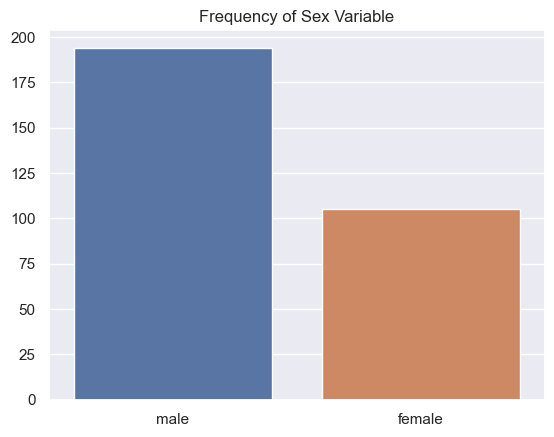

In [8]:
plt.title('Frequency of Sex Variable')
sns.barplot(x = df_sex.value_counts().index, y = df_sex.value_counts().values)
plt.show()

### Observation:
- ##### It is clear that there are much more male than females in this dataset.

#### ii. Checking number anaemia cases:

In [9]:
df_anaemia = df['anaemia']
df_anaemia = df_anaemia.map({1:'Yes',0:'No'})

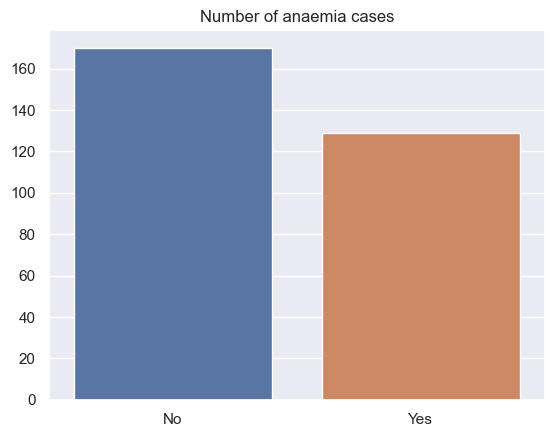

In [10]:
plt.title('Number of anaemia cases')
sns.barplot(x = df_anaemia.value_counts().index, y = df_anaemia.value_counts().values)
plt.show()

### Observation:
- ##### It is clear that the presence of anaemia is less.

#### iii. Checking number diabetes cases:

In [11]:
df_diabetes = df['diabetes']
df_diabetes = df_diabetes.map({1:'Yes',0:'No'})

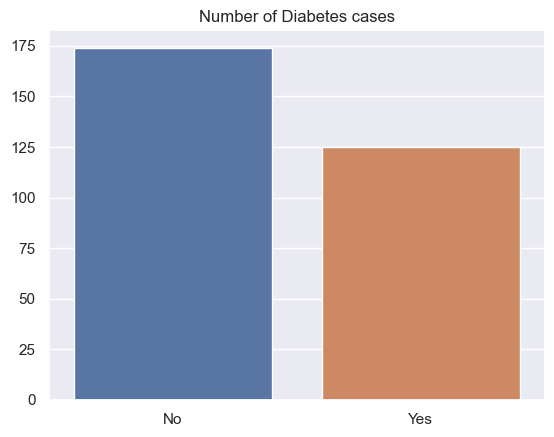

In [12]:
plt.title('Number of Diabetes cases')
sns.barplot(x = df_diabetes.value_counts().index, y = df_diabetes.value_counts().values)
plt.show()

### Observation:
- ##### It is clear that the presence of diabetes is less.

#### iv. Checking number high blood pressure cases:

In [13]:
df_high_blood_pressure = df['high_blood_pressure']
df_high_blood_pressure = df_high_blood_pressure.map({1:'Yes',0:'No'})

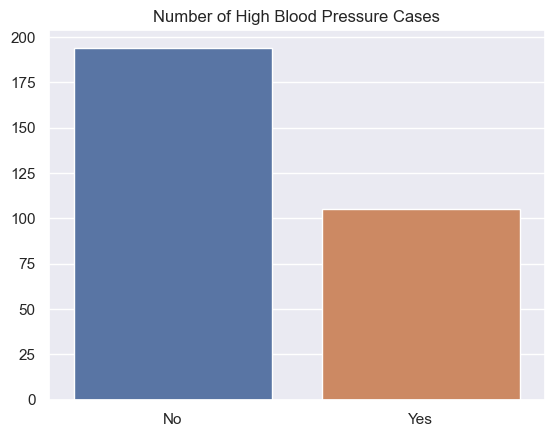

In [14]:
plt.title('Number of High Blood Pressure Cases')
sns.barplot(x = df_high_blood_pressure.value_counts().index, y = df_high_blood_pressure.value_counts().values)
plt.show()

### Observation:
- ##### It is clear that the presence of high blood pressure  is less.

#### v. Checking number smoking cases:

In [15]:
df_smoking = df['smoking']
df_smoking = df_smoking.map({1:'Yes',0:'No'})

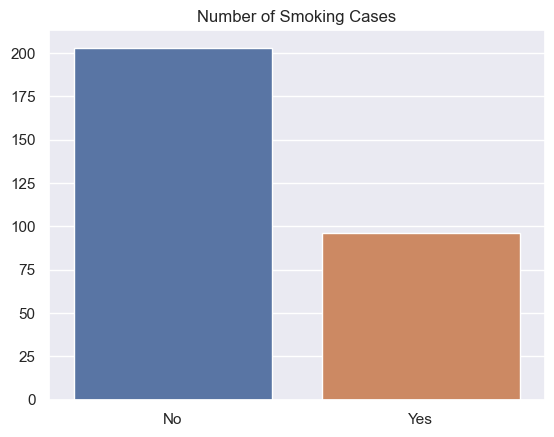

In [16]:
plt.title('Number of Smoking Cases')
sns.barplot(x = df_smoking.value_counts().index, y = df_smoking.value_counts().values)
plt.show()

### Observation:
- ##### It is clear that the presence of smoking  is less.

#### vi. Checking number Death Event cases:

In [17]:
df_death = df['DEATH_EVENT']
df_death = df_death.map({1:'Yes',0:'No'})

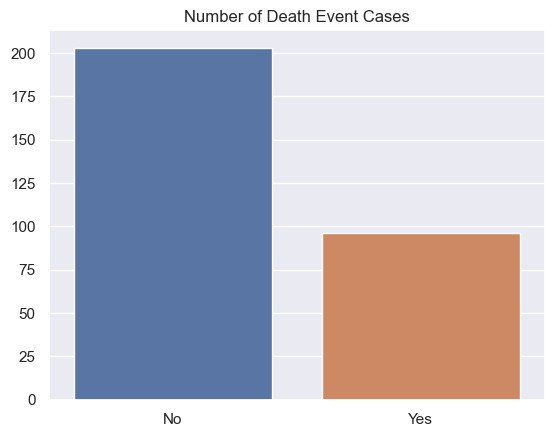

In [18]:
plt.title('Number of Death Event Cases')
sns.barplot(x = df_death.value_counts().index, y = df_death.value_counts().values)
plt.show()

### Observation:
- ##### It is clear that the presence of deaths are less.

### II. For Continuous Variables: 

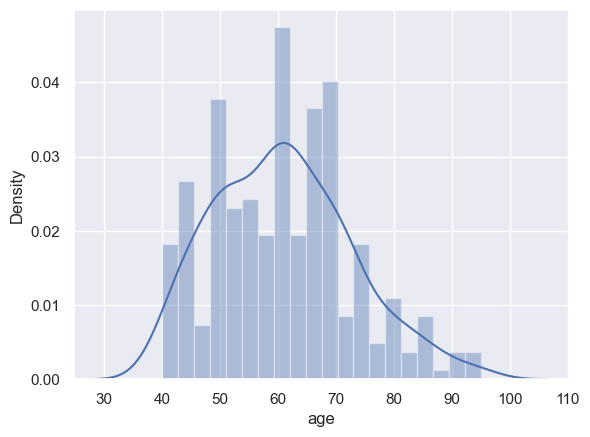

In [19]:
## Distribution of age
sns.distplot(df['age'],bins=20)
plt.show()

### Observation:
- ##### Age is not normally distributed bcs theres also value peek at age 70.

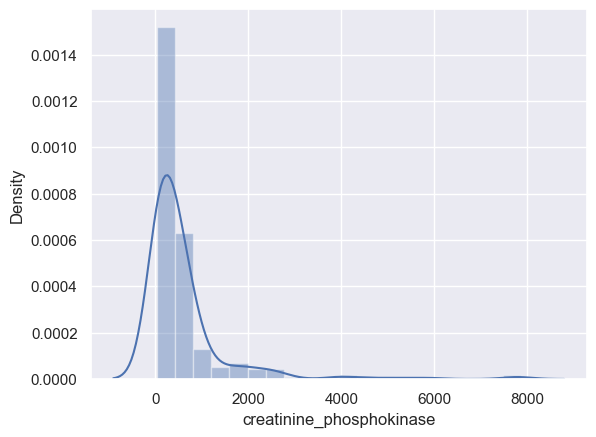

In [20]:
## DIstribution of creatinine_phosphokinase
sns.distplot(df['creatinine_phosphokinase'],bins=20)
plt.show()

### Observation:
- ##### creatinine_phosphokinase is right skewed and have some outliers.

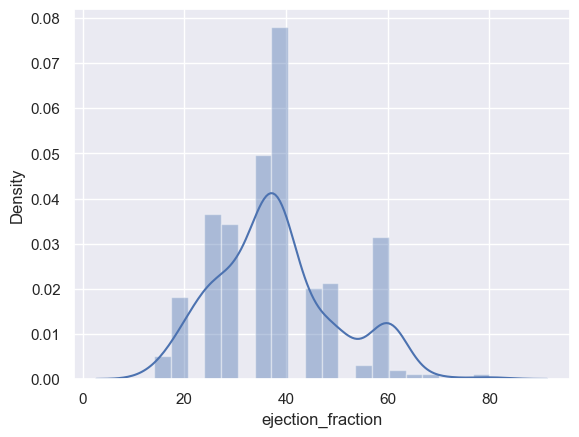

In [21]:
## Distribution of ejection_fraction
sns.distplot(df['ejection_fraction'],bins=20)
plt.show()

### Observation:
- ##### Ejection_Fraction not normalized.

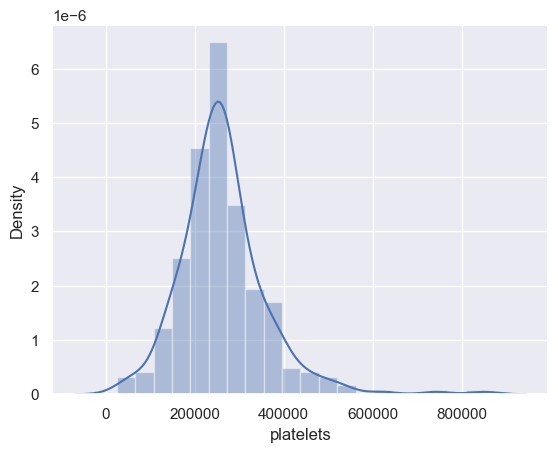

In [22]:
## Distribution of Platelets
sns.distplot(df['platelets'],bins=20)
plt.show()

### Observation:
- ##### Platelets is almost normalized and might have some outliers.

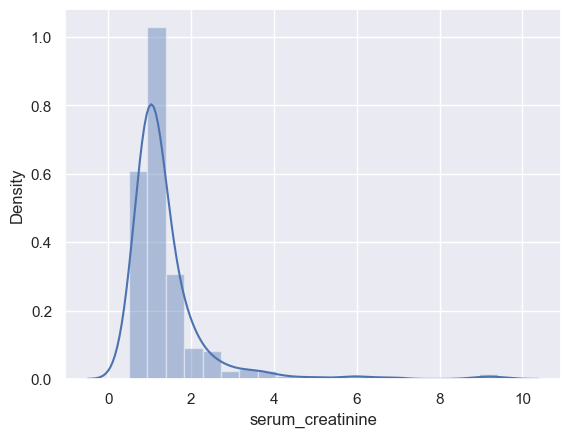

In [23]:
## serum_creatinine distribution
sns.distplot(df['serum_creatinine'],bins=20)
plt.show()

### Observation:
- ##### serum_creatinine is right skewed and have some outliers.

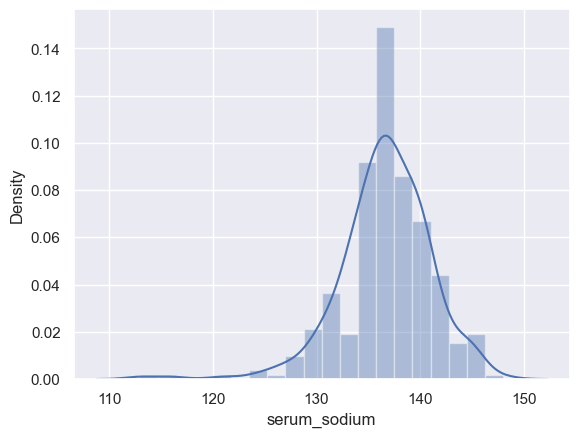

In [24]:
## serum_sodium distribution
sns.distplot(df['serum_sodium'],bins=20)
plt.show()

### Observation:
- ##### serum_sodium is almost normalized.

### III. Checking Relationship with Target:

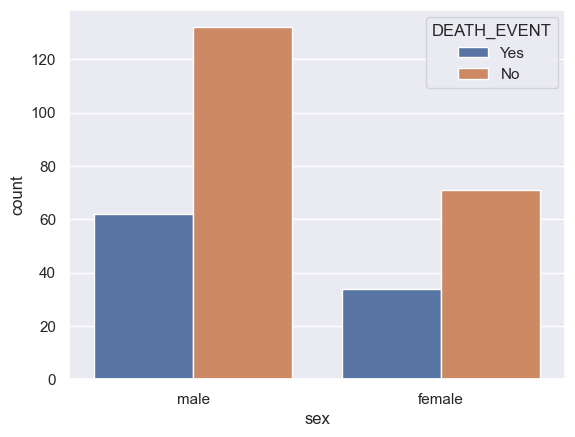

In [25]:
## Sex and death_event
sns.countplot(x=df_sex,hue=df_death)
plt.show()

### Observation:
- ##### Males are more dead than females.

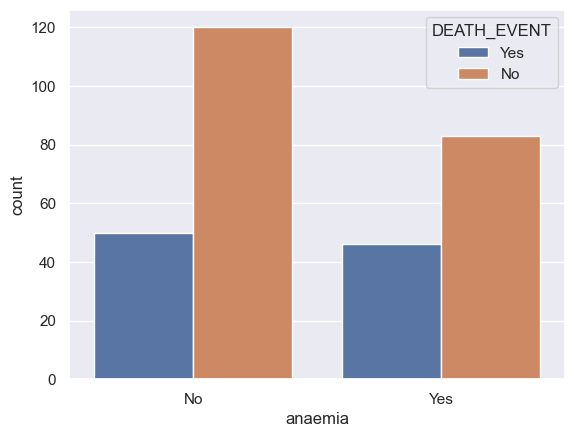

In [26]:
## Anaemia and Death_EVENT
sns.countplot(x=df_anaemia,hue=df_death)
plt.show()

### Observation:
- ##### Presence of anameia also not have much affect or reason of death

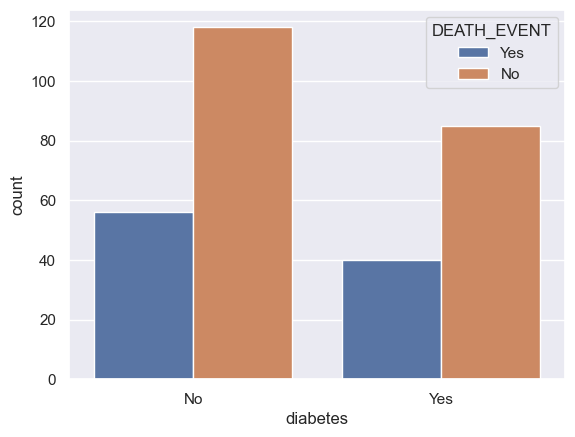

In [27]:
## Diabetes and Death_EVENT
sns.countplot(x=df_diabetes,hue=df_death)
plt.show()

### Observation:
- ##### Presence of diabetes also not have much affect or reason of death

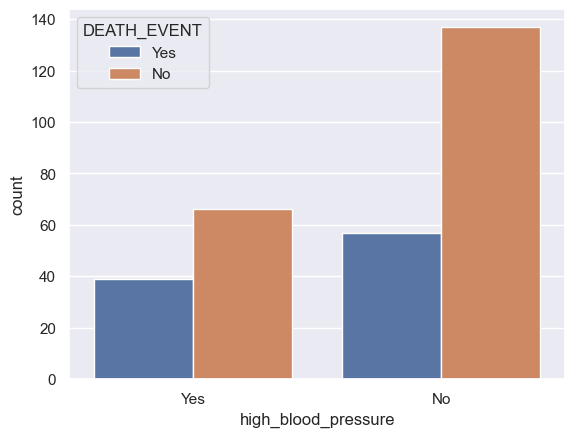

In [28]:
## High Blood Pressure and Death_EVENT
sns.countplot(x=df_high_blood_pressure,hue=df_death)
plt.show()

### Observation:
- ##### Presence of high blood pressure also not have much affect or reason of death

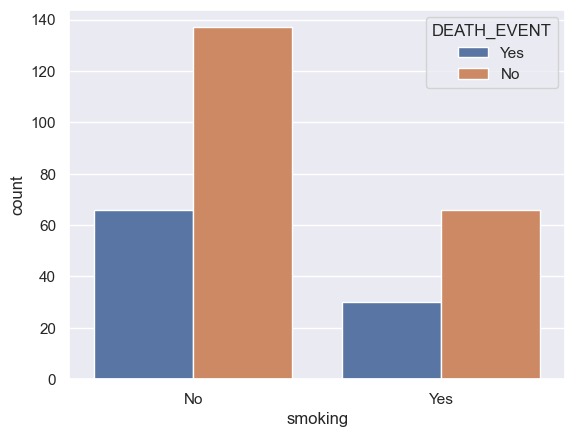

In [29]:
## Smoking and Death_EVENT
sns.countplot(x=df_smoking,hue=df_death)
plt.show()

### Observation:
- ##### Smoking  is also not a major or reason of death

### Observation on relationship with target:
- #### The reason is that beacuse we don't have much data and data is not balanced bcs there is much more no's than yes in our target variable.

### IV. Checking Outliers

In [30]:
col = ['age', 'creatinine_phosphokinase','ejection_fraction','platelets',
       'serum_creatinine', 'serum_sodium', 'time']

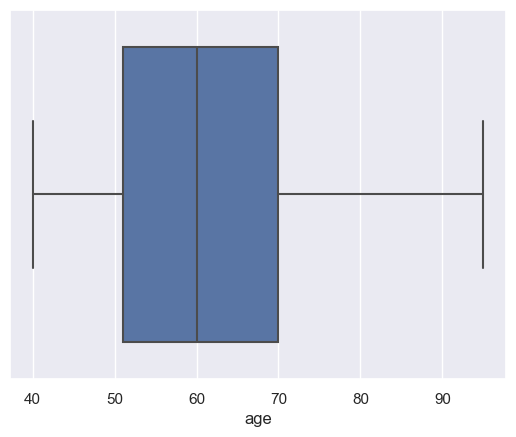

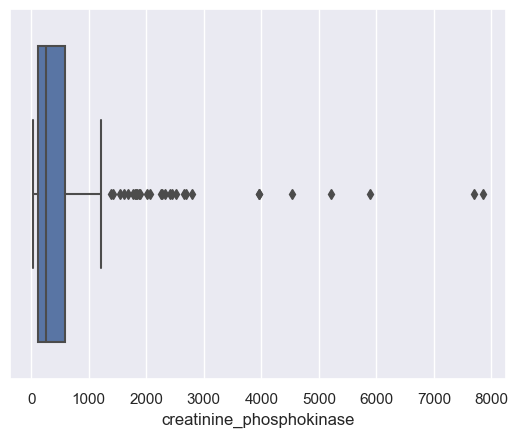

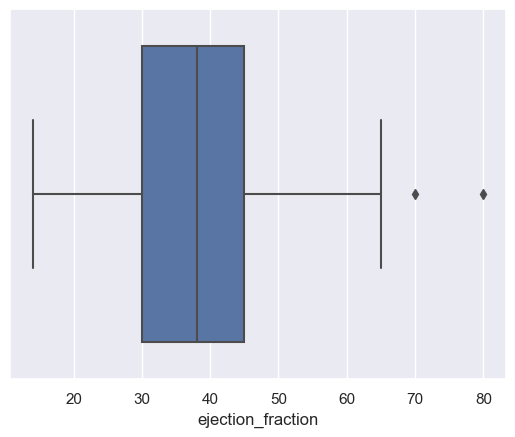

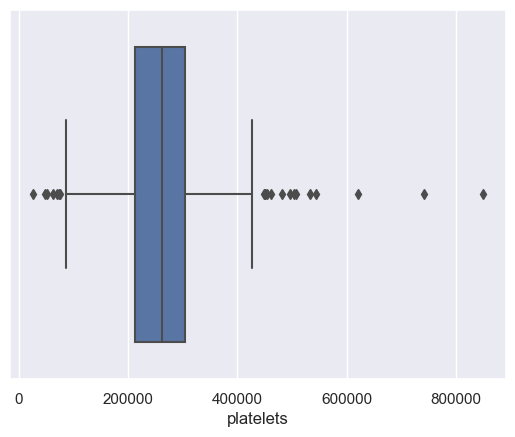

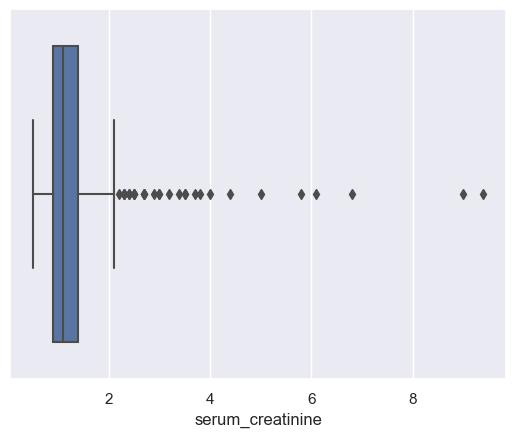

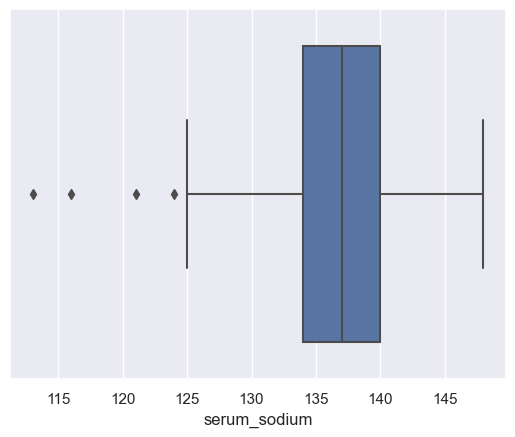

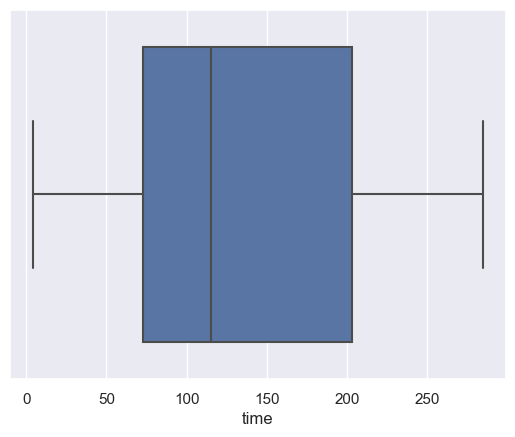

In [31]:
for i in col:
    sns.boxplot(df[i])
    plt.show()

### Observation:
- ##### So we have some outliers in creatinine_phosphokinase, platelets, serum_creatinine, serum_sodium

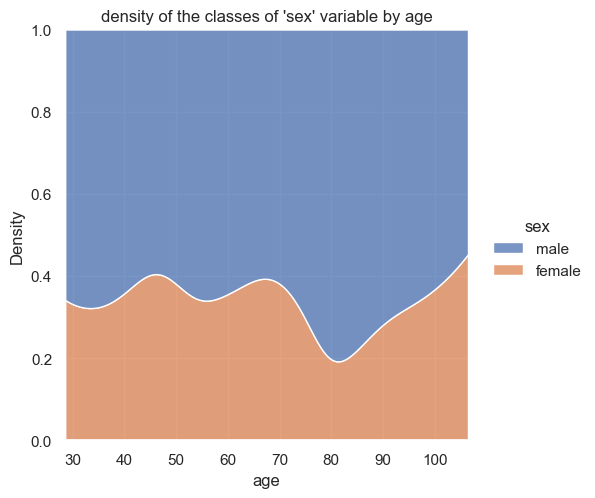

In [32]:
sns.displot(x=df['age'],hue=df_sex,kind='kde',multiple='fill').set(
    title="density of the classes of 'sex' variable by age")
plt.show()

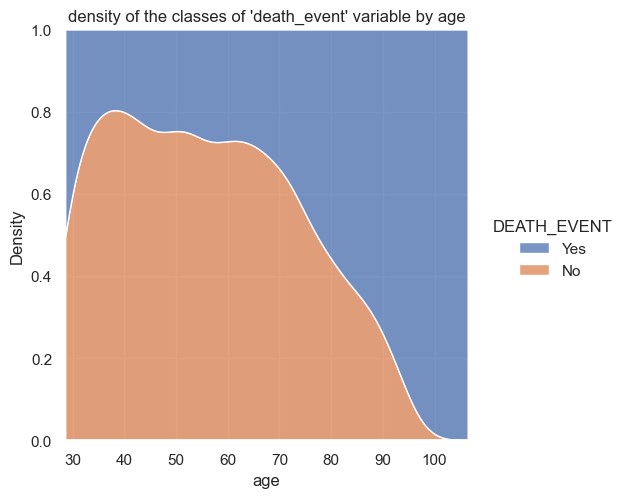

In [33]:
sns.displot(x=df['age'],hue=df_death,kind='kde',multiple='fill').set(
    title = "density of the classes of 'death_event' variable by age")
plt.show()

<AxesSubplot:xlabel='age', ylabel='time'>

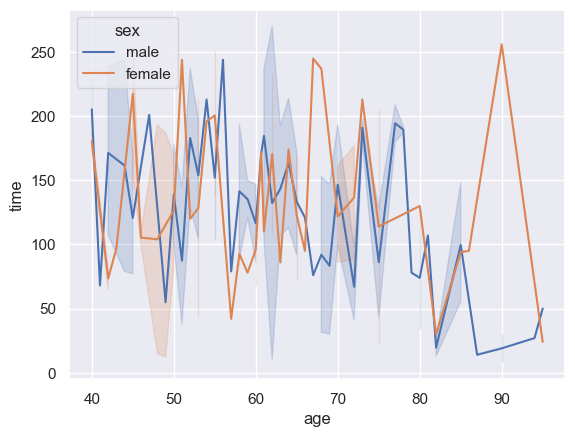

In [34]:
sns.lineplot(x=df['age'],y=df['time'],hue=df_sex)

### Observation:
- ##### With the passage of time it shows that females used to live longer than males

### V. Heatmap for Correlation

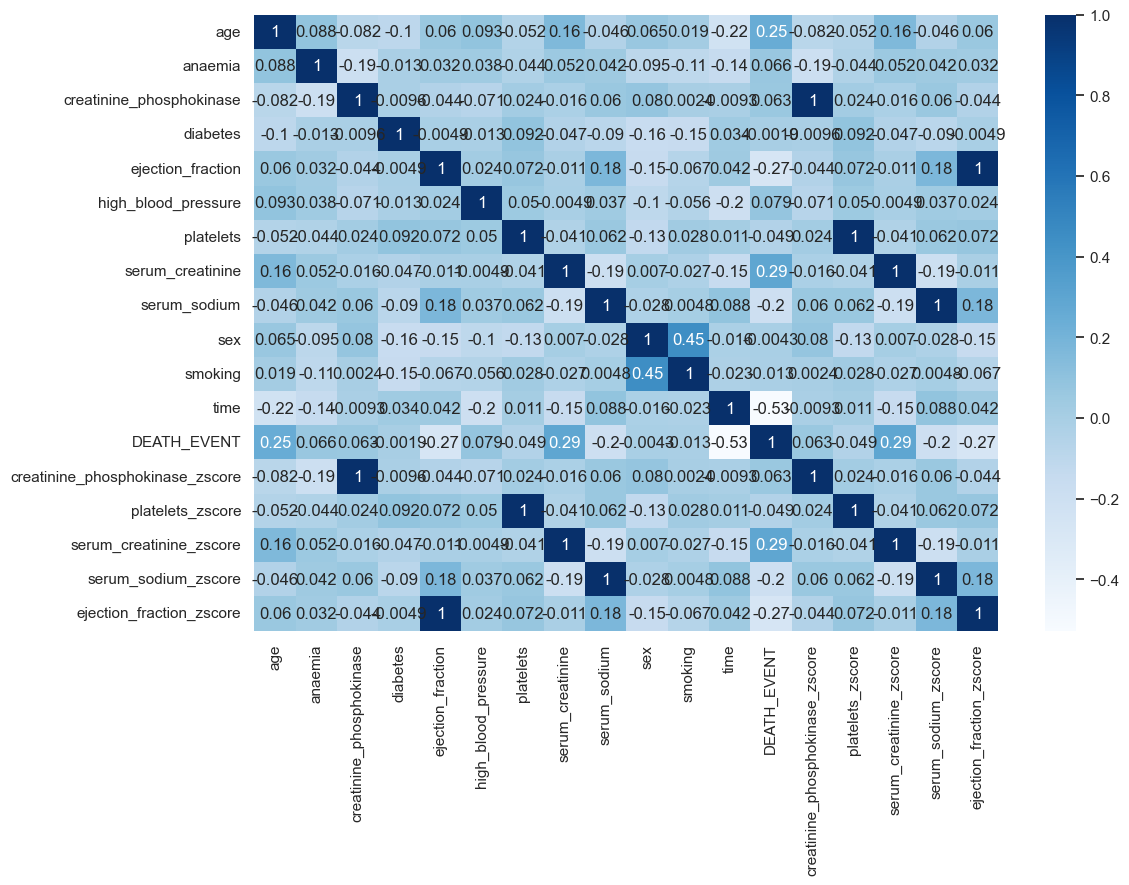

In [124]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap="Blues")
plt.show()

### Observation:
- ##### age is highly correlated with death_event.
- ##### serum_creatinine is highly correlated with death_event.
- ##### Smoking is highly correlated with sex.
- ##### ejection_fraction is correlated with serium_sodium.
- ##### Age is correlated with serium_creatinine.

### 7. Removing Outliers

In [36]:
df['creatinine_phosphokinase_zscore'] = (df['creatinine_phosphokinase']-df['creatinine_phosphokinase'].mean())/df['creatinine_phosphokinase'].std()
df['platelets_zscore'] = (df['platelets']-df['platelets'].mean())/df['platelets'].std()
df['serum_creatinine_zscore'] = (df['serum_creatinine']-df['serum_creatinine'].mean())/df['serum_creatinine'].std()
df['serum_sodium_zscore'] = (df['serum_sodium']-df['serum_sodium'].mean())/df['serum_sodium'].std()
df['ejection_fraction_zscore'] = (df['ejection_fraction']-df['ejection_fraction'].mean())/df['ejection_fraction'].std()


In [37]:
df.head()
print(df.shape)

(299, 18)


In [38]:
df_outliers = df[(df['creatinine_phosphokinase_zscore']>-3) & (df['creatinine_phosphokinase_zscore']<3)]

In [39]:
df_outliers.shape

(292, 18)

In [40]:
df_outliers2 = df_outliers[(df_outliers['platelets_zscore']>-3) & (df_outliers['platelets_zscore']<3)]

In [41]:
df_outliers2.shape

(289, 18)

In [42]:
df_outliers3 = df_outliers2[(df_outliers2['serum_creatinine_zscore']>-3) & (df_outliers2['serum_creatinine_zscore']<3)]

In [43]:
df_outliers3.shape

(284, 18)

In [44]:
df_outliers4 = df_outliers3[(df_outliers3['serum_sodium_zscore']>-3) & (df_outliers3['serum_sodium_zscore']<3)]

In [45]:
df_outliers4.shape

(281, 18)

In [46]:
df_outliers5 = df_outliers4[(df_outliers4['ejection_fraction_zscore']>-3) & (df_outliers4['ejection_fraction_zscore']<3)]

In [47]:
df_outliers5.shape

(280, 18)

In [48]:
final_df = df_outliers5.copy()

In [49]:
final_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,creatinine_phosphokinase_zscore,platelets_zscore,serum_creatinine_zscore,serum_sodium_zscore,ejection_fraction_zscore
0,75.0,0,582,0,20,1,265000.0,1.9,130,1,0,4,1,0.000165,0.016788,0.489237,-1.501519,-1.527998
2,65.0,0,146,0,20,0,162000.0,1.3,129,1,1,7,1,-0.449186,-1.036336,-0.090748,-1.728149,-1.527998
3,50.0,1,111,0,20,0,210000.0,1.9,137,1,0,7,1,-0.485257,-0.545559,0.489237,0.084892,-1.527998
5,90.0,1,47,0,40,1,204000.0,2.1,132,1,1,8,1,-0.551217,-0.606907,0.682565,-1.048259,0.161928
6,75.0,1,246,0,15,0,127000.0,1.2,137,1,0,10,1,-0.346124,-1.394193,-0.187412,0.084892,-1.950479


In [50]:
final_df.drop(['creatinine_phosphokinase_zscore', 'platelets_zscore',
       'serum_creatinine_zscore', 'serum_sodium_zscore',
       'ejection_fraction_zscore'],axis=1,inplace=True)

In [51]:
final_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.0,1.9,130,1,0,4,1
2,65.0,0,146,0,20,0,162000.0,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.0,1.9,137,1,0,7,1
5,90.0,1,47,0,40,1,204000.0,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.0,1.2,137,1,0,10,1


### 8. Splitting data

In [52]:
X = final_df.drop('DEATH_EVENT',axis=1)
y = final_df['DEATH_EVENT']

In [53]:
X

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.0,1.9,130,1,0,4
2,65.0,0,146,0,20,0,162000.0,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.0,1.9,137,1,0,7
5,90.0,1,47,0,40,1,204000.0,2.1,132,1,1,8
6,75.0,1,246,0,15,0,127000.0,1.2,137,1,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...
293,63.0,1,103,1,35,0,179000.0,0.9,136,1,1,270
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280


In [54]:
y

0      1
2      1
3      1
5      1
6      1
      ..
293    0
294    0
295    0
297    0
298    0
Name: DEATH_EVENT, Length: 280, dtype: int64

In [73]:
##Train Test Split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [74]:
X_train.shape

(224, 12)

In [75]:
X_test.shape

(56, 12)

### 9. Data Standardization

In [76]:
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler  = scaler.transform(X_test)

In [77]:
X_train_scaler

array([[ 0.3382681 , -0.8819171 ,  0.19027471, ...,  0.74535599,
         1.49879178,  1.00057174],
       [-0.09063048,  1.13389342, -0.62040956, ...,  0.74535599,
        -0.66720408, -0.69746713],
       [-0.26218991, -0.8819171 ,  0.19027471, ...,  0.74535599,
         1.49879178, -0.84114735],
       ...,
       [-0.69108849,  1.13389342,  0.19027471, ...,  0.74535599,
         1.49879178,  0.96138622],
       [ 1.62496384,  1.13389342,  0.13534517, ...,  0.74535599,
        -0.66720408, -1.23300247],
       [-0.09063048,  1.13389342,  3.40838821, ..., -1.34164079,
        -0.66720408,  0.6740258 ]])

In [78]:
X_test_scaler

array([[-0.26218991, -0.8819171 , -0.63935078,  1.20894105,  0.02897888,
         1.35478524,  0.74814544, -0.96250946,  1.28175519, -1.34164079,
        -0.66720408, -0.6844053 ],
       [-0.09063048,  1.13389342, -0.41963261,  1.20894105,  0.02897888,
        -0.73812437, -0.07109115,  1.56743797, -1.23237058, -1.34164079,
         1.49879178, -1.18075512],
       [ 1.53918412,  1.13389342, -0.80792765, -0.82717019,  1.09603688,
         1.35478524, -1.01548889,  0.89278532, -0.980958  ,  0.74535599,
        -0.66720408, -0.74971448],
       [-0.94842764,  1.13389342, -0.68291559,  1.20894105,  0.20682188,
        -0.73812437, -0.01419972, -0.96250946, -1.73519573,  0.74535599,
        -0.66720408,  0.51728375],
       [-0.00485077, -0.8819171 , -0.44236208, -0.82717019, -0.68239312,
         1.35478524,  0.06544828, -0.96250946, -0.22672027,  0.74535599,
         1.49879178, -0.41010671],
       [-0.26218991, -0.8819171 , -0.66208024,  1.20894105,  0.02897888,
         1.35478524, -

### 10. Models

### a. RandomForestClassifier

In [98]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaler,y_train)

RandomForestClassifier()

In [99]:
y_pred = rf_model.predict(X_test_scaler)

In [100]:
print(accuracy_score(y_pred,y_test))

0.8571428571428571


### b. LogisticRegression

In [82]:
lr_model = LogisticRegression()
lr_model.fit(X_train_scaler,y_train)

LogisticRegression()

In [83]:
y_pred = lr_model.predict(X_test_scaler)

In [84]:
print(accuracy_score(y_pred,y_test))

0.8571428571428571


### b. XGBOOST Classifier

In [85]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train_scaler,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [86]:
y_pred = xgb_model.predict(X_test_scaler)

In [87]:
print(accuracy_score(y_pred,y_test))

0.875


In [88]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90        36
           1       0.81      0.85      0.83        20

    accuracy                           0.88        56
   macro avg       0.86      0.87      0.87        56
weighted avg       0.88      0.88      0.88        56



In [89]:
cm = confusion_matrix(y_pred,y_test)
cm

array([[32,  4],
       [ 3, 17]], dtype=int64)

<AxesSubplot:>

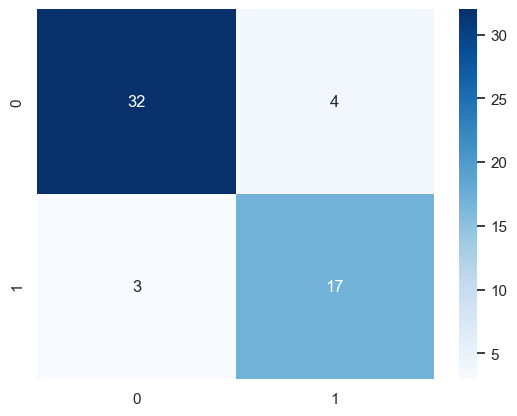

In [90]:
sns.heatmap(cm,annot=True,cmap='Blues')

## Create a Pipline:

In [114]:
from sklearn.pipeline import Pipeline
steps = [('scaler',StandardScaler()),('model',XGBClassifier())]
pipeline = Pipeline(steps)

In [115]:
pipeline.fit(X_train.values,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=6, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=100, n_jobs=0, num_parallel_tree=1,
                               predictor='auto', random_state=0, reg_alpha=0,
                               reg_lambda=1, ...))])

In [116]:
y_pred = pipeline.predict(X_test)

In [117]:
print(accuracy_score(y_pred,y_test))

0.875


## Pickle file:

In [118]:
import pickle
pickle.dump(pipeline,open('model.pkl','wb'))